<a href="https://colab.research.google.com/github/SUJOY-RAY/House-Price-prediction/blob/main/House_price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [ ]:
pd.set_option('display.max_columns',None)

In [ ]:
# import pandas as pd
dataframe=pd.read_csv('/content/house_data.csv')
dataframe = dataframe.apply(pd.to_numeric, errors='coerce',downcast='integer')
dataframe.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
dataframe.shape


(21613, 21)

In [ ]:
dataframe=dataframe.drop(['id','lat','long',],axis=1)

In [ ]:
dataframe.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,20141013,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650
1,20141209,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639
2,20150225,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062
3,20141209,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000
4,20150218,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503


In [ ]:
dataframe['total area']=dataframe['sqft_living']+dataframe['sqft_basement']+dataframe['sqft_lot']+dataframe['sqft_above']+dataframe['sqft_living15']+dataframe['sqft_lot15']
dataframe.drop(['sqft_living','sqft_basement','sqft_lot'],axis=1,inplace=True)
dataframe['average condition grade'] = (dataframe['condition'] + dataframe['grade']) / 2
dataframe.drop(['condition','grade'],axis=1,inplace=True)
dataframe.head()


,date,price,bedrooms,bathrooms,floors,waterfront,view,sqft_above,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,total area,average condition grade
0,20141013,221900,3,1.00,1.0,0,0,1180,1955,0,98178,1340,5650,15000,5.0
1,20141209,538000,3,2.25,2.0,0,0,2170,1951,1991,98125,1690,7639,21711,5.0
2,20150225,180000,2,1.00,1.0,0,0,770,1933,0,98028,2720,8062,22322,4.5
3,20141209,604000,4,3.00,1.0,0,0,1050,1965,0,98136,1360,5000,15280,6.0
4,20150218,510000,3,2.00,1.0,0,0,1680,1987,0,98074,1800,7503,20743,5.5


In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     21613 non-null  int32  
 1   price                    21613 non-null  int32  
 2   bedrooms                 21613 non-null  int8   
 3   bathrooms                21613 non-null  float64
 4   floors                   21613 non-null  float64
 5   waterfront               21613 non-null  int8   
 6   view                     21613 non-null  int8   
 7   sqft_above               21613 non-null  int16  
 8   yr_built                 21613 non-null  int16  
 9   yr_renovated             21613 non-null  int16  
 10  zipcode                  21613 non-null  int32  
 11  sqft_living15            21613 non-null  int16  
 12  sqft_lot15               21613 non-null  int32  
 13  total area               21613 non-null  int32  
 14  average condition grad

In [ ]:
dataframe.head()

,date,price,bedrooms,bathrooms,floors,waterfront,view,sqft_above,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,total area,average condition grade
0,20141013,221900,3,1.00,1.0,0,0,1180,1955,0,98178,1340,5650,15000,5.0
1,20141209,538000,3,2.25,2.0,0,0,2170,1951,1991,98125,1690,7639,21711,5.0
2,20150225,180000,2,1.00,1.0,0,0,770,1933,0,98028,2720,8062,22322,4.5
3,20141209,604000,4,3.00,1.0,0,0,1050,1965,0,98136,1360,5000,15280,6.0
4,20150218,510000,3,2.00,1.0,0,0,1680,1987,0,98074,1800,7503,20743,5.5


In [ ]:
dataframe.isnull().sum()
dataframe.describe()

,date,price,bedrooms,bathrooms,floors,waterfront,view,sqft_above,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,total area,average condition grade
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000
mean,2.014390e+07,5.401822e+05,3.370842,2.114757,1.494309,0.007542,0.234303,1788.390691,1971.005136,84.402258,98077.939805,1986.552492,12768.455652,3.402178e+04,5.533151
std,4.436582e+03,3.673622e+05,0.930062,0.770163,0.539989,0.086517,0.766318,828.090978,29.373411,401.679240,53.505026,685.391304,27304.179631,6.443590e+04,0.629254
min,2.014050e+07,7.500000e+04,0.000000,0.000000,1.000000,0.000000,0.000000,290.000000,1900.000000,0.000000,98001.000000,399.000000,651.000000,3.881000e+03,1.000000
25%,2.014072e+07,3.219500e+05,3.000000,1.750000,1.000000,0.000000,0.000000,1190.000000,1951.000000,0.000000,98033.000000,1490.000000,5100.000000,1.598100e+04,5.000000
50%,2.014102e+07,4.500000e+05,3.000000,2.250000,1.500000,0.000000,0.000000,1560.000000,1975.000000,0.000000,98065.000000,1840.000000,7620.000000,2.111000e+04,5.500000
75%,2.015022e+07,6.450000e+05,4.000000,2.500000,2.000000,0.000000,0.000000,2210.000000,1997.000000,0.000000,98118.000000,2360.000000,10083.000000,2.777000e+04,6.000000
max,2.015053e+07,7.700000e+06,33.000000,8.000000,3.500000,1.000000,4.000000,9410.000000,2015.000000,2015.000000,98199.000000,6210.000000,871200.000000,2.082100e+06,8.500000


In [ ]:
dataframe.head()

,date,price,bedrooms,bathrooms,floors,waterfront,view,sqft_above,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,total area,average condition grade
0,20141013,221900,3,1.00,1.0,0,0,1180,1955,0,98178,1340,5650,15000,5.0
1,20141209,538000,3,2.25,2.0,0,0,2170,1951,1991,98125,1690,7639,21711,5.0
2,20150225,180000,2,1.00,1.0,0,0,770,1933,0,98028,2720,8062,22322,4.5
3,20141209,604000,4,3.00,1.0,0,0,1050,1965,0,98136,1360,5000,15280,6.0
4,20150218,510000,3,2.00,1.0,0,0,1680,1987,0,98074,1800,7503,20743,5.5


In [ ]:
# from sklearn.preprocessing import StandardScaler
# le=StandardScaler()
# dataframe['total area']=le.fit_transform(dataframe[['total area']])
# dataframe['bedrooms']=le.fit_transform(dataframe[['bedrooms']])
# dataframe['bathrooms']=le.fit_transform(dataframe[['bathrooms']])
# dataframe['floors']=le.fit_transform(dataframe[['floors']])
# dataframe['yr_built']=le.fit_transform(dataframe[['yr_built']])
# dataframe['yr_renovated']=le.fit_transform(dataframe[['yr_renovated']])
# dataframe['waterfront']=le.fit_transform(dataframe[['waterfront']])
# dataframe['view']=le.fit_transform(dataframe[['view']])

<Axes: >

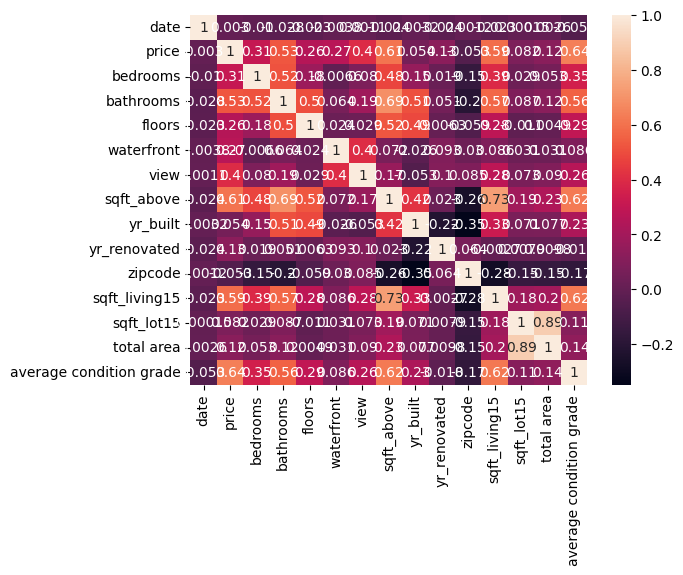

In [ ]:
import seaborn as sns
corr=dataframe.corr()
sns.heatmap(corr,annot=True)

In [ ]:
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score

X = dataframe.drop('price', axis=1)
y = dataframe['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

model1=LinearRegression()
model2=DecisionTreeRegressor()
model3=RandomForestRegressor()
model4=XGBRegressor()
# model5=LogisticRegression()
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)
model4.fit(X_train, y_train)
# model5.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
print(r2_score(model1.predict(X_test),y_test))
print(r2_score(model2.predict(X_test),y_test))
print(r2_score(model3.predict(X_test),y_test))
print(r2_score(model4.predict(X_test),y_test))
# print(r2_score(model5.predict(X_test),y_test))

0.2994270363013958
0.580979899490516
0.6913548215168328
0.8059184312512625
